<a href="https://colab.research.google.com/github/rionapampati/AIChat/blob/main/CS_ECE_181_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Build Your Own Photoshop

Adobe Photoshop is pretty expensive these days - so let's build our own!

<small>v1.0.1</small>

**DUE DATE**: October 27, 11:59pm Pacific via Canvas

* You can save a copy of this document in your own Drive and work on it in your own Colab
* You can add comments, multiple cells, etc. Just make sure to explain what you did so that we can give you partial credit.
* Make sure to rely only on allowed Python libraries. Each problem will state what's allowed.
* Remember, you are expected to work alone. You can ask questions on Piazza or discuss a solution approach with your peers, but you must not copy their code.
The implementation must be yours. **The use of AI-based tools is not allowed.** Assignments that were generated with the use of AI will receive 0 points.
* When you're done, go to "Runtime > Restart session and run all" to make sure your notebook runs correctly from top to bottom.
* **You need to submit two things: an .ipynb and .pdf file.** Go to "Download > Download .ipynb" to download the raw Jupyter Notebook file. Then go to "Print > Save as PDF" (or similar). **Make sure the files were produced correctly - meaning your solutions and generated images are visible.** We can only grade what you submit. Then upload both files to the Project 1 Assignment folder.

Changelog:
- v1.0.0: Initial version
- v1.0.1 clarified question 1.5, add the color image

## 0. Introduction

For those of you who are new to Jupyter Notebook / Google Colab, here's a quick crashcourse.

Colab is a cloud host for [Jupyter Notebook](https://realpython.com/jupyter-notebook-introduction/), allowing you to write Python code in your browser. If you host a Jupyter Notebook locally, you can configure it to run [C++](https://blog.jupyter.org/interactive-workflows-for-c-with-jupyter-fe9b54227d92) or [MATLAB](https://am111.readthedocs.io/en/latest/jmatlab_install.html), too.

The cool thing about Colab is that it comes pre-installed with lots of [libraries for scientific computing](https://stackoverflow.com/questions/47109539/what-are-the-available-libraries-within-google-colaboratory), and it stores a copy of your notebook in GDrive.

One thing to note is that your Notebook will go offline after it stays idle for a while. So every time you open the Notebook (or after time-out), you will have to run all your code cells again (this includes importing your libraries).



### Executing Python code

You can run any valid Python code in the code cells of the Notebook. For example:

In [33]:
2 + 2

4

You can execute the cell by clicking on the "Play" button.

Alternatively, you can use a keyboard shortcut:

- `Ctrl+Enter`: execute the cell
- `Shift+Enter`: execute the cell and select the next cell below it (create one if necessary)

You can see all Keyboard Shortcuts by going to "Tools > Keyboard shortcuts".

Other useful commands include (click into a cell first):

- `Esc+A`: create a cell above the current one
- `Esc+B`: create a cell below the current one
- `Ctrl+M+D`: delete the current cell

Try it!

### Other useful stuff

Colab will give you hints about a function's use. This happens automatically while you're typing. Try it yourself:

First, import NumPy (numerical python, with lots of math functions).
It's customary to import it with an alias "np" so that you don't always have to type "numpy":

In [34]:
import numpy as np

After that, let's try to call the sine function, but let's pretend we forgot what it does. Start typing "np.sin(" but then wait for a second - a window should pop up that shows you the docstring for this function. It will tell you what the function does and which arguments it accepts:

In [35]:
np.sin(0)

0.0

### Important

Jupyter Notebooks use a global workspace. This means that if you define a variable (e.g., `a=1`), then from that point in time forward, `a` will be defined globally in the notebook.

This means that you can (accidentally) define a variable in the last cell of the notebook, and when you re-execute a previous cell, the variable will still be defined. So be careful when designing notebooks to execute stuff from top to bottom.

Before turning something in, it is therefore a good idea to select "Runtime > Restart and run all". This will make sure that your notebook runs correctly top to bottom.

**Reminder: The use of generative AI is not allowed.** Yes, we can tell. Also, it defeats the purpose. Struggle now - get a good job later! Assignments that were generated with the use of AI-based tools will receive 0 points.

### Loading images

In this assignment, we will be using [scikit-image](https://scikit-image.org/) for our image processing needs.

It comes pre-installed with Colab, so you can just import it.
However, scikit-image is built such that you want to import just the things you need. For example, instead of typing

    import skimage

or even worse:

    from skimage import *

it is customary to import just the functions you need (so as not to clutter up your Python workspace).

There are a number of example images in [skimage.data](https://scikit-image.org/docs/0.3/api/scikits.image.data.html)

In [36]:
from skimage import data as example_images

You might recognize the following picture from lecture. We can use Matplotlib to plot the image (using colormap 'grayscale').

I encourage you to explore the other images in `example_images`.

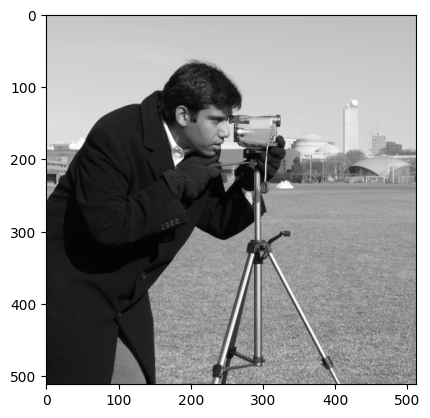

In [37]:
camera_man = example_images.camera()

import matplotlib.pyplot as plt
plt.imshow(camera_man, cmap='gray')

We can inspect `camera_man` to see that it is a 512x512 grayscale image with gray levels 0-255 (dtype 'uint8'):

In [38]:
camera_man.shape, camera_man.dtype

((512, 512), dtype('uint8'))

# 1. Image Transformations (10 pts)

In this section, you will implement basic image transformations, such as shifting, adjusting brightness and contrast, and correcting color balance.

**Note: The use of functions in scikit-image's `filter` module is not allowed in Section 1.** That would defeat the purpose. Please implement your filters as NumPy arrays. You can use SciPy's [convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function to convolve them with an image.

## 1.1 **TODO**: Write a kernel that shifts an image 1 pixel up (1 pt)

Give a NumPy array that represents a filter to shift an image upwards by 1 pixel using convolution. Demonstrate your filter on the camera man image from above.

In [39]:
kernel = np.array([[0,1,0],[0,0,0],[0,0,0]])

(-0.5, 511.5, 511.5, -0.5)

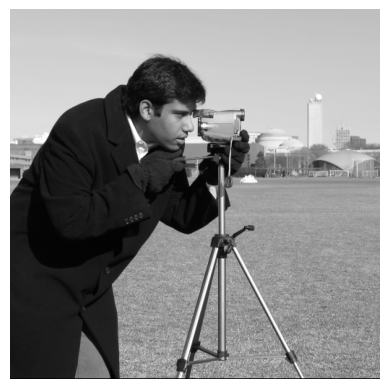

In [40]:
from scipy.signal import convolve2d

conv_img = convolve2d(camera_man, kernel, mode='same')
plt.imshow(conv_img, cmap='gray')
plt.axis('off')

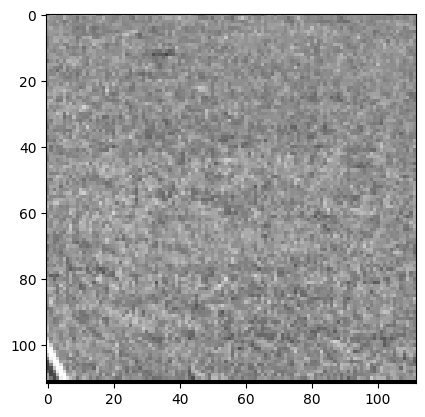

In [41]:
# Zoom in on the bottom-right corner to show that there's a row of
# black pixels at the bottom, but no more black pixels on the right:
plt.imshow(conv_img[400:, 400:], cmap='gray')

## 1.2 **TODO**: Shift an image 2 pixels up & 2 pixels to the left (2 pts)

How would you write a kernel that shifts an image both up and to the left? This time, we want to shift the image 2 pixels up and 2 pixels to the left.

In [42]:
kernel = np.array([[1,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0]])

(-0.5, 511.5, 511.5, -0.5)

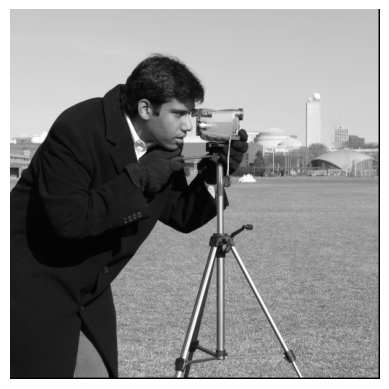

In [43]:
conv_img = convolve2d(camera_man, kernel, mode='same')
plt.imshow(conv_img, cmap='gray')
plt.axis('off')

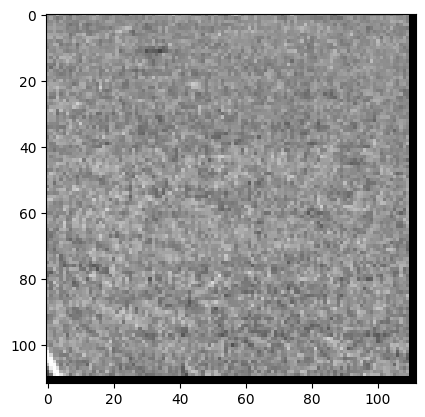

In [44]:
# Zoom in on the bottom-right corner to show that there's now
# a 2px-wide black border:
plt.imshow(conv_img[400:, 400:], cmap='gray')

## 1.3 **TODO**: Brightness adjustment (2 pts)

Adjust the brightness of the camera man image by adding a constant `c` to each pixel value. Make sure the gray levels stay within the valid range.

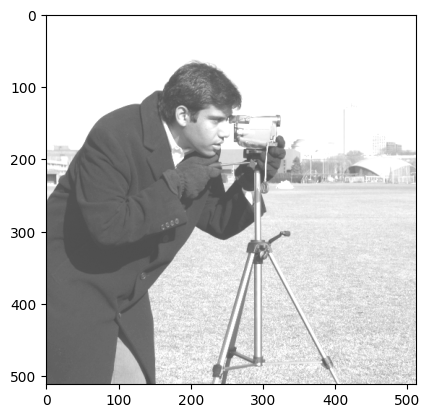

In [45]:
c = 75

camera_man2 = camera_man.copy()

for i in range(camera_man2.shape[0]):
  for j in range(camera_man2.shape[0]):
    if (c + camera_man[i][j] > 255):
        camera_man2[i][j] = 255
    elif (camera_man2[i][j] < 0):
        camera_man2[i][j] = 0
    else:
      camera_man2[i][j] += c

plt.imshow(camera_man2, cmap='gray', vmin=0, vmax=255)
plt.show()

## 1.4 **TODO**: Contrast adjustment (2 pts)

Reduce the contrast of the camera man image by a factor of 2.

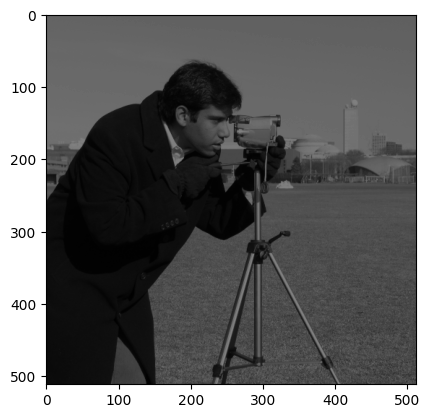

In [46]:
kernel = np.array([[0,0,0], [0,1/2,0], [0,0,0]])
camera_man3 = convolve2d(camera_man, kernel, mode='same')
plt.imshow(camera_man3, cmap='gray', vmin=0, vmax=255)

## 1.5 **TODO**: Color (white) balance (3 pts)

White balance is an essential step in image processing to correct color casts in an image, ensuring that colors appear as natural as possible. When an image has an incorrect white balance, white areas of the image might appear tinted with a certain color (e.g., a blueish or yellowish cast).

Why does this happen? Different lighting conditions (daylight, tungsten, fluorescent lights, etc.) affect how colors appear to the camera. For example, an image taken under fluorescent lights may have a blue tint, while one taken under tungsten lights may have a yellow tint.

Goal: Adjust the white balance to neutralize these tints, so that white objects in the scene appear truly white, which in turn makes all the colors look more natural.

To correct the white balance of an image, one common approach is to normalize the intensity values of the red, green, and blue channels. The idea is to ensure that the mean (or maximum) values of the RGB channels are balanced, so that white areas of the image contain equal amounts of red, green, and blue.

Since the camera man image is grayscale image, here we'll use another color image.

Use the following code to load the astronaut image

`astronaut = example_images.astronaut()`

Demonstrate your code on the astronaut image, displaying it "before" and "after" white balance correction.

141.56249237060547
105.75944519042969
96.4750747680664
114.59900410970052
[0.8095294324833197, 1.083581744432891, 1.1878612624577432]


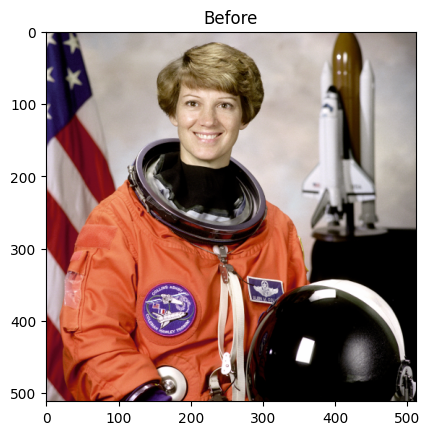

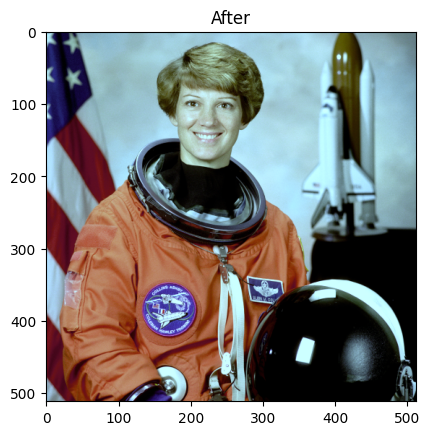

In [47]:
astronaut = example_images.astronaut()

# Getting the averages of RGB channels
avg_color = np.mean(astronaut, axis=(0, 1))
print(avg_color[0])
print(avg_color[1])
print(avg_color[2])

total_avg = np.mean(avg_color)
print(total_avg)

redRatio = total_avg / avg_color[0]
greenRatio = total_avg / avg_color[1]
blueRatio = total_avg / avg_color[2]

weights = [redRatio, greenRatio, blueRatio]
print(weights)
result = weights*astronaut # Normalize the new image based on the weights


result = np.clip(result, 0, 255).astype(np.uint8) #Normalize based on vmin and vmax

plt.imshow(astronaut)
plt.title("Before")
plt.show()
plt.imshow(result)
plt.title('After')
plt.show()

# 2. Image Filters (10 pts)

In this section, we want to implement our own image filters.

**Note: The use of functions in scikit-image's `filter` module is not allowed in Section 2.** Again, that would defeat the purpose. Please implement your filters as NumPy arrays. You can use SciPy's [convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function to convolve them with an image.

*Hint: If you need, you can use ` * ` or `np.multiply` for element-wise multiplicaton of two NumPy arrays. Matrix multiplication can be achieved with the `@` operator.*

## 2.1 **TODO**: Sobel filter (5 pts)

Implement your own Sobel filter using the following steps:

1. Write a Sobel filter that detects horizontal edges in the image
2. Write a Sobel filter that detects vertical edges in the image
3. Put the two directional derivatives together to calculate edge magnitude. The result should look qualitatively similar to [`skimage.filters.sobel`](https://scikit-image.org/docs/0.3/api/scikits.image.filter.html#sobel).

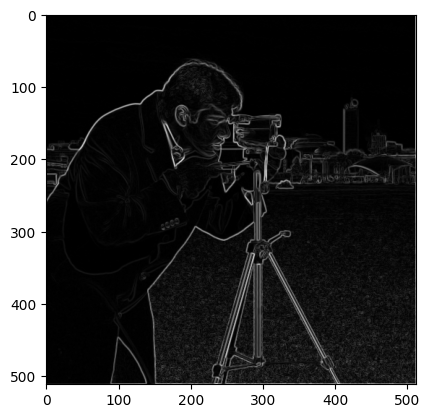

In [48]:
sobelHorizontal = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobelVertical = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

convX = convolve2d(camera_man, sobelHorizontal, mode='same')
convY = convolve2d(camera_man, sobelVertical, mode='same')
camera_man4 = np.sqrt(np.square(convX) + np.square(convY))

plt.imshow(camera_man4, cmap='gray')


You can compare your result to the one returned by scikit-image.

However, your result will likely be different from the official implementation, because:
- we are operating on ubit images, they are operating on float images
- their filter might use the opposite sign
- they might also normalize the image in an interesting way

But your result should qualitatively look the same as this:

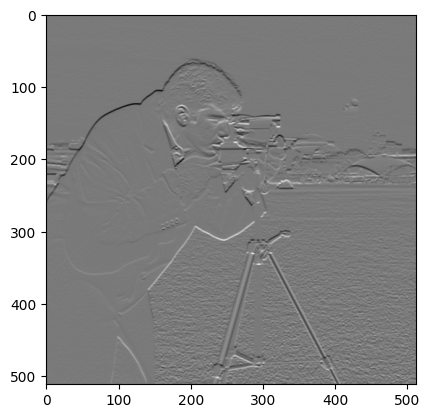

In [49]:
from skimage.filters import sobel_h
plt.imshow(sobel_h(camera_man), cmap='gray')

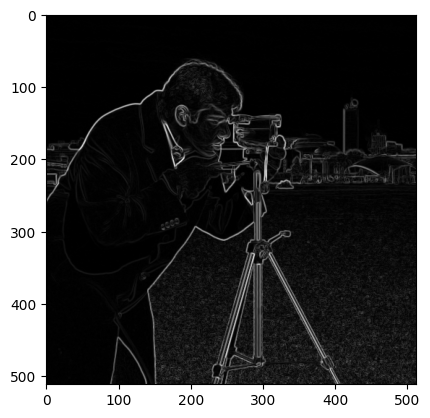

In [50]:
# Compare (qualitatively) to the skimage solution:
from skimage.filters import sobel
plt.imshow(sobel(camera_man), cmap='gray')

## 2.2 **TODO**: Sharpening filter (5 pts)

Implement a sharpening filter by combining the original camera man image with its Gaussian-blurred version.

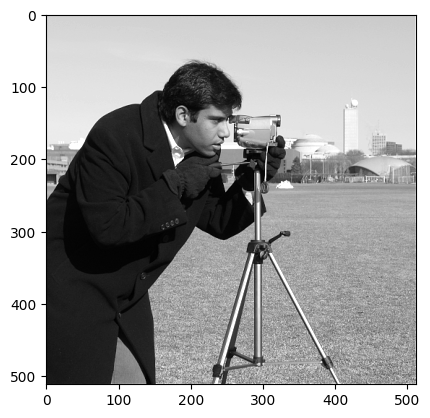

In [51]:
kernel = np.array([[0,0,0], [0,2,0], [0,0,0]])
gaussian = np.array([[1,2,1], [2,4,1], [1,2,1]])
gaussian = gaussian/16

total = kernel - gaussian

camera_man5 = convolve2d(camera_man, total, mode='same')
plt.imshow(camera_man5, cmap='gray', vmin=0, vmax=255)
plt.show()

# 3. Canny Edge Detection (10 pts)

Now we want to implement Canny edge detection using `skimage.feature.canny`. You might find [this example](https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html) helpful.

Scikit-Image does most of the job for you, but you need to finetune the Canny parameters.

## 3.1 **TODO**: Experiment with the standard deviation of the Gaussian filter (3 pts)

Let's apply Canny to the image of the camera man that we used above.
The first parameter we want to focus on is `sigma`. How does the output change with varying `sigma` values, and why?

Which `sigma` value would you choose for this particular image and why?

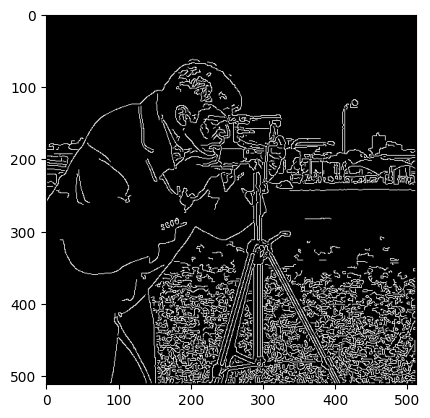

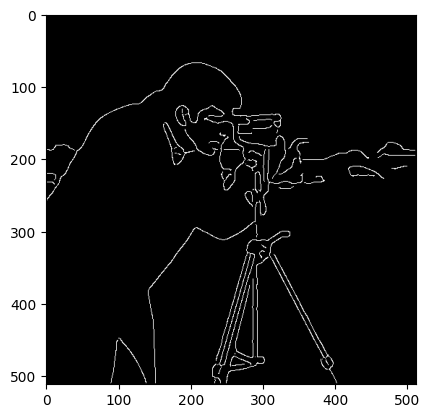

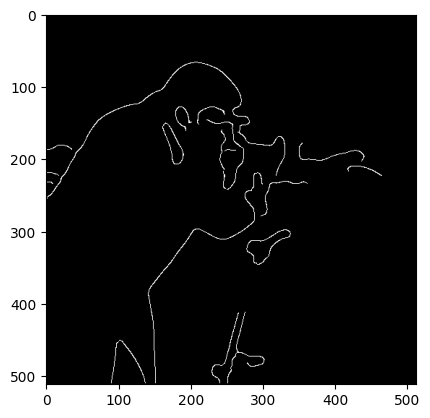

In [52]:
from skimage.feature import canny

plt.imshow(canny(camera_man, sigma=1), cmap='gray')
plt.show()
plt.imshow(canny(camera_man, sigma=3), cmap='gray')
plt.show()
plt.imshow(canny(camera_man, sigma=5), cmap='gray')
plt.show()

---

**YOUR ANSWER HERE**

---
The output becomes more smooth as the sigma values increase. The sigma value of 5 had the most smooth, squiggly looking lines capturing the least number of edges. The sigma value of 1 had the sharpest lines and captured the most number of edges. Canny makes use of Gaussian blurring, and sigma controls the filter size in a Gaussian filter. Therefore, when you increase the filter size (sigma), it increases the blur, reduces the noise, and the edges become more smooth. Whereas, when you decrease the filter size (sigma), it decreases the noise, so the edges are more sharp. For this image, I would choose a sigma value of 3 because the image is not too noisy but it still retains the most important aspects of the edges without losing too much detail. Anything smaller makes the edges hard to focus on, but anything greater would not be interpretable.

How does increasing $\sigma$ affect the sharpness of the edges? At what point do the edges become too smoothed to be useful?

---

**YOUR ANSWER HERE**

---
Increasing sigma affects the sharpness of the edges because the noise is decreased with a bigger filter, so the image becomes more smooth, so the edges are less sharp. Basically, sigma affects the size of the Gaussian filter, therefore directly affecting the sharpness of the edges. The edges seem to become too smoothed to be useful around a sigma value of 4 because it is hard to make out most of the details of the image.

## 3.2 **TODO**: Experiment with the thresholds (3 pts)

The other two parameters are `high_threshold` and `low_threshold`, which define the upper and lower bound for the hysteresis thresholding, respectively. How does the result change as you vary these two parameters, and why?

Which values would you choose for this particular image and why?

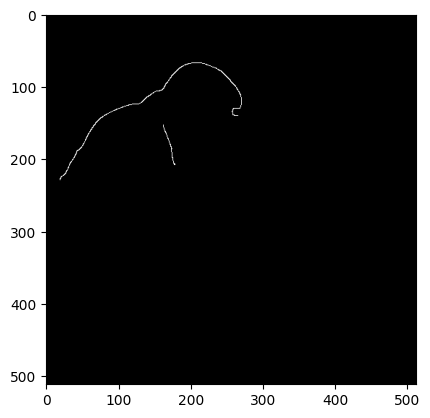

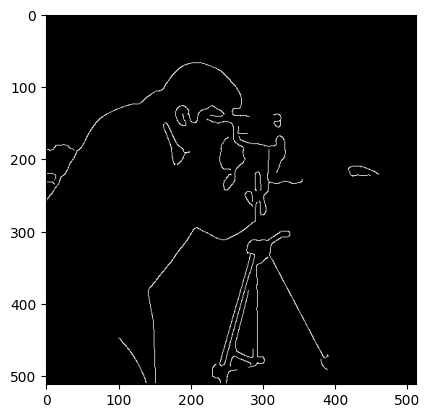

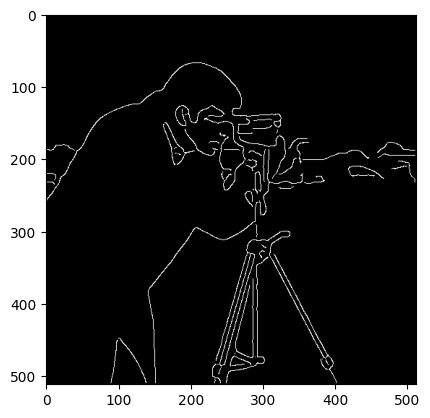

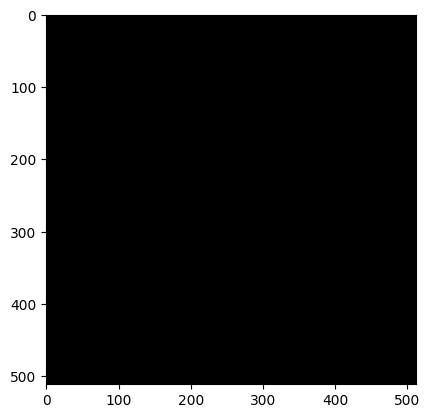

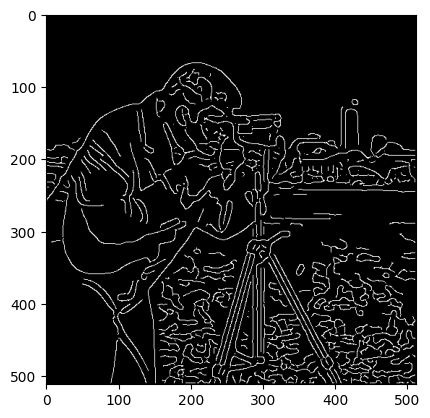

In [53]:
plt.imshow(canny(camera_man, sigma=3, high_threshold=200, low_threshold=100), cmap='gray')
plt.show()
plt.imshow(canny(camera_man, sigma=3, high_threshold=100, low_threshold=50), cmap='gray')
plt.show()
plt.imshow(canny(camera_man, sigma=3, high_threshold=50, low_threshold=25), cmap='gray')
plt.show()
plt.imshow(canny(camera_man, sigma=3, high_threshold=250, low_threshold=10), cmap='gray')
plt.show()
plt.imshow(canny(camera_man, sigma=3, high_threshold=10, low_threshold=5), cmap='gray')
plt.show()

---




**YOUR ANSWER HERE**

---
The high threshold represents the value at which point any pixels higher that that value are turned white. The low threshold represents the value at which point any pixels lower than that value are turned black. By playing around with these threshold parameters, we are making modifications to which edges are strong enough to pull through the Canny edge detection. Having higher values for both these thresholds leads to less edges showing through due to more pixels going to white. Having lower values for both these thresholds leads to more edges showing through due to more pixels going to black. For this particular image, I would choose the high threshold to be 50 and the low threshold to be 25 based on what I experimented with because I feel like these values allowed the most number of relevant edges to show through without the image becoming noisy.

What happens to the edges when the thresholds are set too close together or too far apart? How does this affect the quality of edge detection?

---

**YOUR ANSWER HERE**

---
Everything outside of the threshold are considered "strong" edges which show through very clearly through Canny detection, while everything inside the threshold are considered "weak" edges which do not show through Canny detection. So, when the thresholds are set too close together, you get a lot of edges since they are majority strong edges (see last image above). And, when the edges are too far apart, there are just too many weak edges (see second to last image that has no edges seen through Canny). This affects the quality of edge detection because having the thresholds too far apart makes the detection too selective, but having the thresholds too close together makes the detection not selective enough. The quality of edge detection does best under moderate threshold conditions.

## 3.3 **TODO**: Compare Canny and Sobel (4 pts)

Using the parameter values you identified above, compare the edges detected by Canny and Sobel. How do they differ? Consider factors like edge smoothness, noise, and the types of edges each method highlights.

---

**YOUR ANSWER HERE**

---
Canny provides smoother, clearer edges while Sobel seems to provide edges that sometimes soften depending on the contrast in the image. Sobel edge dectection is much simpler, with only implicit smoothing to limit noise. Whereas, Canny takes care of noise reduction more explicitly by using a Gaussian filter before the edge detection.


Which algorithm performs better for detecting finer edges? When might you prefer one method over the other?

---

**YOUR ANSWER HERE**

---
Canny edge detection performs better for detecting finer edges because it takes care of noise reduction better, and the double threshold method that detects strong vs. weak edges is more effective when trying to detect finer edges than Sobel's single threshold method. As a result, Canny is able to produce finer, more precise edges.
You might prefer Sobel when you want a simpler, more computationally inexpensive filter to be used on an image without much noise. You will probably prefer to use Canny edge detection in all other cases though.

# 4. Marr-Hildreth Algorithm (20 pts)

Lastly, we want to follow up on the edge detection lecture and implement the [Marr-Hildreth edge algorithm](https://en.wikipedia.org/wiki/Marr%E2%80%93Hildreth_algorithm) from scratch. Although this name did not come up in class, it is based on filters and operators that should be familiar to you.

The algorithm can be divided into two steps:
- Convolving the image (at different scales) with the Laplacian of a Gaussian.
- Searching for zero crossings in the filtered image to obtain the edges.

You can again use the camera man image to demonstrate your solution.

## 4.1 **TODO:** Gaussian pyramid (6 pts)

Using only [NumPy](https://numpy.org), write a function that returns a Gaussian kernel of a given width, $\sigma$:

$$ g(x,y; \sigma) = \exp \bigg(-\frac{(x-x_0)^2+(y-y_0)^2}{2 \sigma^2} \bigg) $$

Here, the Gaussian function is centered on $(x_0, y_0)$.

Note that the kernel size should equal at least 3 sigma of the continuous Gaussian function, which means that the filter size is not a constant and should increase with sigma.
Make sure that the filter size is always an odd number (round up if necessary).

It's also a good idea to normalize the kernel so that all filter elements add up to 1. This way, you don't artficially change the range of grayscale values in the image.

In [54]:
import numpy as np

def gaussian_kernel(sigma, truncate=3):
    """Gaussian kernel

    Parameters
    ----------
    sigma : float
        Standard deviation of the Gaussian
    truncate : float
        Truncate the kernel at `truncate` standard deviations.
        Default: 3 standard deviations

    Returns
    -------
    gaussian_kernel : np.ndarray
        A (truncate*sigma, truncat*sigma) 2D NumPy array with the Gaussian
        kernel. Number of pixels are rounded up to the nearest odd integer.
    """

    radius = int(np.ceil((truncate*sigma)) / 2)

    if (radius % 2 == 0):
      radius += 1

    x = np.arange(-radius, radius+1)
    y = np.arange(-radius, radius+1)
    x, y = np.meshgrid(x, y)

    gaussian = np.exp(-(x**2 + y**2)/(2*(sigma**2)))

    gaussian = gaussian/np.sum(gaussian)

    return gaussian

Now use your Gaussian function to create five different Gaussian filters with sigma 3, 6, 12, 24, and 48 pixels.

Plot the filters using [Matplotlib](https://matplotlib.org). You may want to check out the [`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) command.

Text(0.5, 0.98, 'Gaussian kernels')

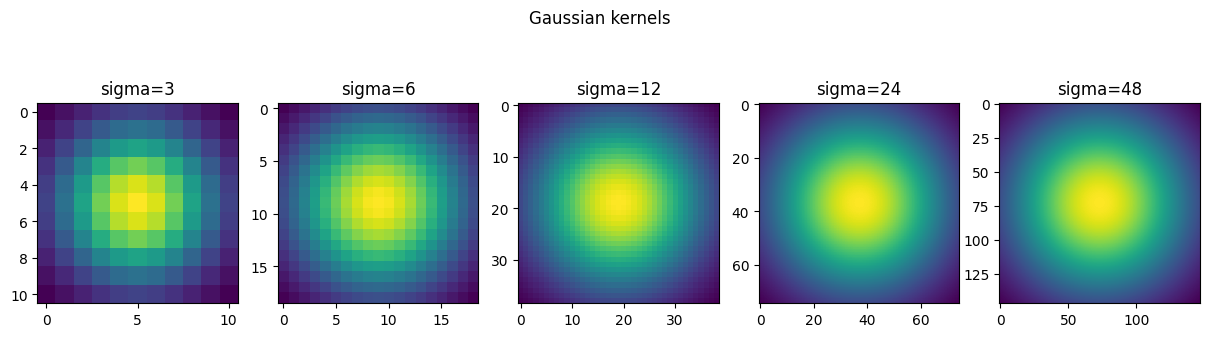

In [55]:
sigmas = [3, 6, 12, 24, 48]

fig, axes = plt.subplots(ncols=len(sigmas), figsize=(15, 4))
for ax, sigma in zip(axes, sigmas):
    ax.imshow(gaussian_kernel(sigma))
    ax.set_title(f'sigma={sigma}')
fig.suptitle('Gaussian kernels')

Then apply each filter to the camera-man image and plot the result. For this, you can use [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).
- Make sure to use mode='same' in `convolve2d` to make the resulting image the same size as the original.
- To avoid border effects, we need to choose a boundary method other than the default - 'wrap' works well, but others are also possible.
If you used 'fill' (default), you should see ringing artifacts (https://en.wikipedia.org/wiki/Ringing_artifacts) that might mess with your Laplacian operator below (especially at larger `sigma`s).

Text(0.5, 0.98, 'Gaussian kernels convolved with camera man')

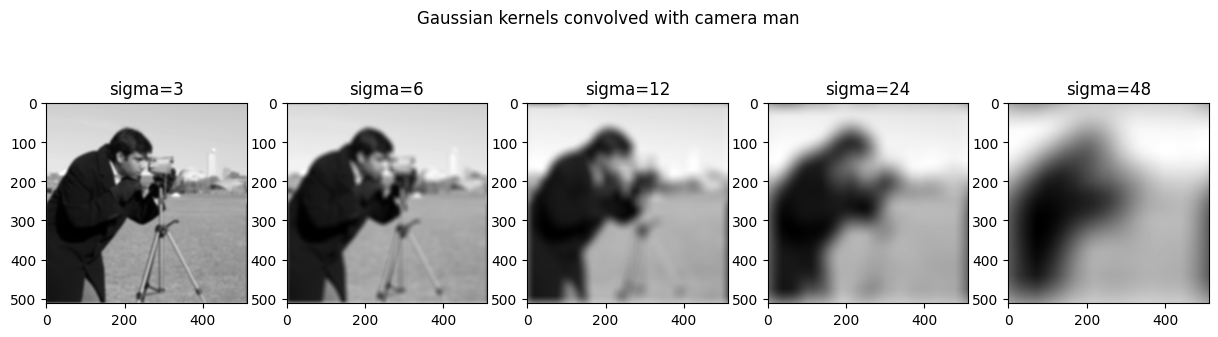

In [56]:
sigmas = [3, 6, 12, 24, 48]

fig, axes = plt.subplots(ncols=len(sigmas), figsize=(15, 4))
for ax, sigma in zip(axes, sigmas):
    ax.imshow(convolve2d(camera_man, gaussian_kernel(sigma), mode='same', boundary='wrap'), cmap='gray')
    ax.set_title(f'sigma={sigma}')
fig.suptitle('Gaussian kernels convolved with camera man')

## 4.2 **TODO:** Laplacian of a Gaussian (3 pts)

Convolve the pyramid of the Gaussian masks with a Laplacian operator mask to generate the Laplacian of a Gaussian (LoG, aka "Mexican Hat").

Then convolve the 5 LoG operators with your input image (so you should get 5 filtered images out):

Text(0.5, 0.98, 'LoG convolved with camera man')

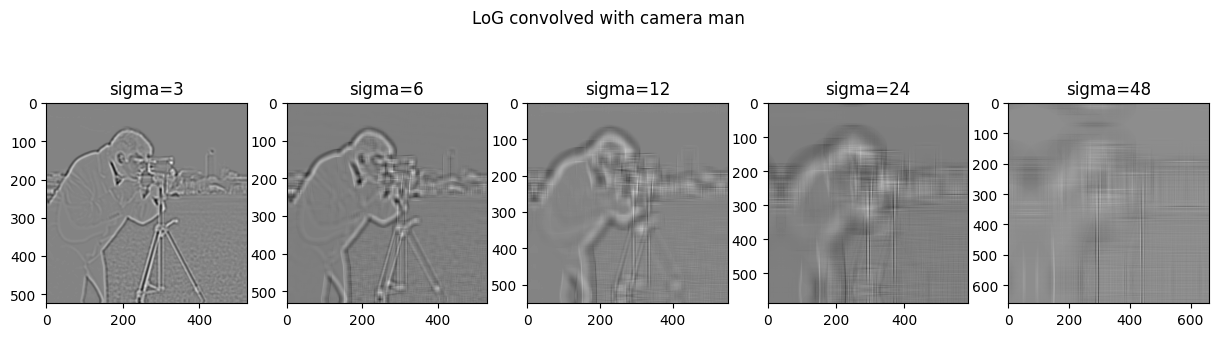

In [57]:
laplacian = np.matrix([[0,1,0],[1,-4,1],[0,1,0]])

fig, axes = plt.subplots(ncols=len(sigmas), figsize=(15, 4))
for ax, sigma in zip(axes, sigmas):
    gaussian = gaussian_kernel(sigma)
    kernel = convolve2d(gaussian, laplacian, mode='full')
    ax.imshow(convolve2d(camera_man, kernel, mode='full', boundary='symm'), cmap='gray')
    ax.set_title(f'sigma={sigma}')
fig.suptitle('LoG convolved with camera man')

Make sure to use boundary='symm' or 'wrap' to reduce the occurrence of ringing artifacts. Even if you used one of these boundary settings, the Laplacian might amplify outlier values found near the image boundaries. As a result, you may still see some artifacts (especially at larger sigma values).

(In my case, sigma=24 and sigma=48 look different, but that's mostly because `ax.imshow` automatically adjusts the grayscale range, so if you change the command to something like `ax.imshow(img_laplace[-1], cmap='gray', vmin=1e-3, vmax=1e3)` the two should look pretty much the same.)

## 4.3 **TODO:** Zero crossings (7 pts)

Finally, we need to detect the zero-crossings (not zeros!) in the filtered images. These will serve as our edge points.

A zero crossing at pixel `p` implies that the signs of at least two opposite neighboring pixels are different. There are four cases to test: left/right, up/down, and the two diagonals (up-left/down-right and up-right/down-left).

A pixel `p` is considered an edge pixel if any of the following conditions are met:
- the sign of the left/right neighbors is opposite AND the difference between their gray levels is greater than `threshold`
- the sign of the up/down neighbors is opposite AND the difference between their gray levels is greater than `threshold`
- the sign of the up-left/down-right neighbors is opposite AND the difference between their gray levels is greater than `threshold`
- the sign of the up-right/down-left neighbors is opposite AND the difference between their gray levels is greater than `threshold`

It is easiest to put all this logic in a function. The function should accept a filtered image `img` and a threshold `threshold`.
It should return an array of zeros and ones (same size as input `img`), where all pixels that are considered edges have a 1, and all other pixels are 0.

In [58]:
def zero_crossings(img, threshold=0.05):
    """Find the zero crossings in an image

    Parameters
    ----------
    img : np.ndarray
        A 2D NumPy array for which zero crossings should be found
    threshold : float, optional
        Minimum difference of neighboring gray values required to consider
        the zero crossing an edge

    Returns
    -------
    zero_cross : np.ndarray
        An image of the same size as `img` with zero crossings=1, all other
        pixels=0
    """
    zero_cross = np.zeros_like(img)
    signs = np.sign(img)
    # padding = np.pad(img, 1, mode='edge')

    for i in range(1,img.shape[0]-1):
      for j in range(1,img.shape[1]-1):
        if (np.sign(img[i-1][j]) != np.sign(img[i+1][j]) and abs(img[i-1][j]-img[i+1][j]) > threshold):
          zero_cross[i][j] = 1;
        if (np.sign(img[i][j-1]) != np.sign(img[i][j+1]) and abs(img[i][j-1]-img[i][j+1]) > threshold):
          zero_cross[i][j] = 1;
        if (np.sign(img[i-1][j+1]) != np.sign(img[i+1][j-1]) and abs(img[i-1][j+1]-img[i+1][j-1]) > threshold):
          zero_cross[i][j] = 1;
        if (np.sign(img[i+1][j+1]) != np.sign(img[i-1][j-1]) and abs(img[i+1][j+1]-img[i-1][j-1]) > threshold):
          zero_cross[i][j] = 1;

    return zero_cross

Then apply the function to the 5 different filtered images to get 5 binary edge maps back.

Experiment with different values of `threshold` to get a good result.
The result should look something like the Canny edge detector: white lines on a black image. You can also google for example of images of the Marr-Hildreth edge detector.

You should see that the edges in the 5 filtered images depend on the sigma of the Gaussian kernel.

Text(0.5, 0.98, 'LoG convolved with camera man and then put through zero crossings')

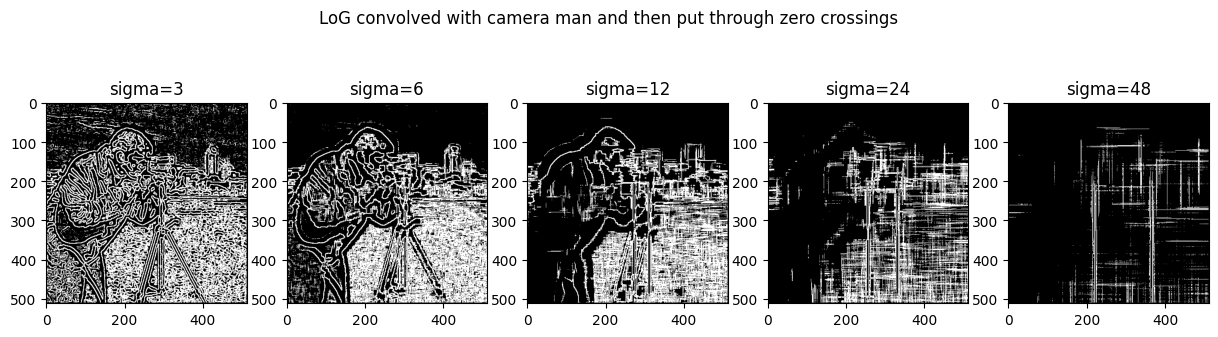

In [59]:
laplacian = np.matrix([[0,1,0],[1,-4,1],[0,1,0]])

fig, axes = plt.subplots(ncols=len(sigmas), figsize=(15, 4))
for ax, sigma in zip(axes, sigmas):
    gaussian = gaussian_kernel(sigma)
    kernel = convolve2d(gaussian, laplacian, mode='full')
    ax.imshow(zero_crossings(convolve2d(camera_man, kernel, mode='same', boundary='symm')), cmap='gray')
    ax.set_title(f'sigma={sigma}')
fig.suptitle('LoG convolved with camera man and then put through zero crossings')

## 4.4 **TODO:** Role of sigma and threshold (4 pts)

Now that you have experimented with different values for `sigma` and `threshold`, what are their respective roles? i.e.
- How does the result change with increasing `sigma`? What do you have to consider when choosing a `sigma` value?
- How does the result change with increasing `threshold`? What do you have to consider when choosing a `threshold` value?

---

**TODO:** As sigma increases, the Gaussian filter size increases, thereby increasing the blur. When choosing a sigma value, you need to consider how much noise there is and how smooth you want your resulting image to be.
The threshold determines which pixels are considered an edge and which ones are too weak to be considered edges. When considering a threshold value, you need to keep in mind how strong the edges in the image are and how much blurring there is (keep sigma in mind) because you don't want a threshold too high so there are too many edges but too low so no edges are captured.

---

# 5. Extra Credit (5 pts)

In this extra credit section, you will experiment with adding noise to images and applying different denoising techniques to clean the noisy images. You will then reflect on which denoising method works best in different situations.

## 5.1 **TODO**: Gaussian and salt-and-pepper noise

First, implement two different types of noise (without the help of `skimage.util`):
- Gaussian noise, also known as normal noise, is typically caused by electronic noise in sensors or cameras. It is characterized by a random distribution of pixel intensities, drawn from a normal distribution with Gaussian width `sigma`.
- Salt-and-pepper noise consists of randomly occuring white an black pixels, like "static" on a TV screen. It is usually caused by sharp, sudden disturbances in image signals. Implement this by flipping a fraction `frac` of pixels to either black or white.

For each noise type, write a function that takes as input an image as well as the noise-specific parameters, and outputs a noisy image. Try it on the camera man image.


In [60]:
def gausNoise(img, sigma, mean=0):
    kernel = np.random.normal(mean, sigma, img.shape)
    noisy_img = img + kernel
    noisy_img = np.clip(noisy_img, 0, 255)
    return noisy_img.astype(np.uint8)

In [61]:
def saltNoise(img, frac):
    noisy_image = np.copy(img)
    salt = np.ceil(frac * img.size * 0.5)
    pepper = np.floor(frac * img.size * 0.5)

    for i in range(int(salt+pepper)):
      x = np.random.randint(0, np.shape(img)[0] - 1)
      y = np.random.randint(0, np.shape(img)[1] - 1)
      if (i%2 == 0):
        noisy_image[x][y] = 0
      else:
        noisy_image[x][y] = 255

    return noisy_image.astype(np.uint8)

Text(0.5, 0.98, 'Gaussian Noise')

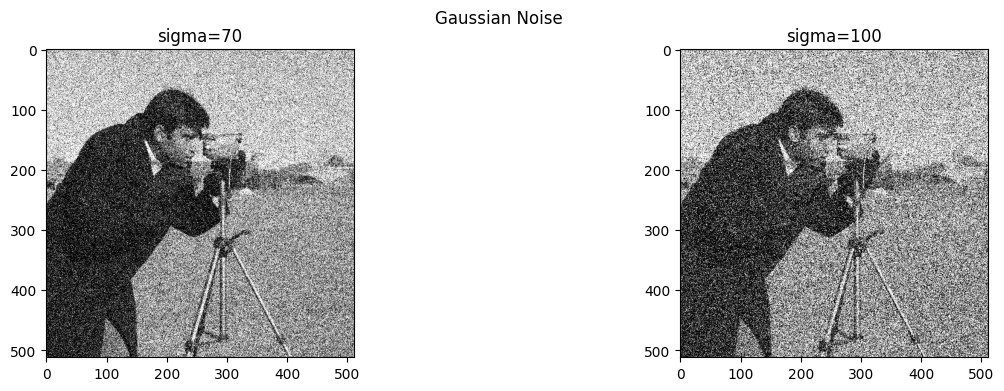

In [62]:
camera_man = example_images.camera()
sigmas = [70, 100]
fig, axes = plt.subplots(ncols=len(sigmas), figsize=(15, 4))
for ax, sigma in zip(axes, sigmas):
    ax.imshow(gausNoise(camera_man, sigma), cmap='gray')
    ax.set_title(f'sigma={sigma}')
fig.suptitle('Gaussian Noise')

Text(0.5, 0.98, 'Salt and Pepper Noise')

<Figure size 640x480 with 0 Axes>

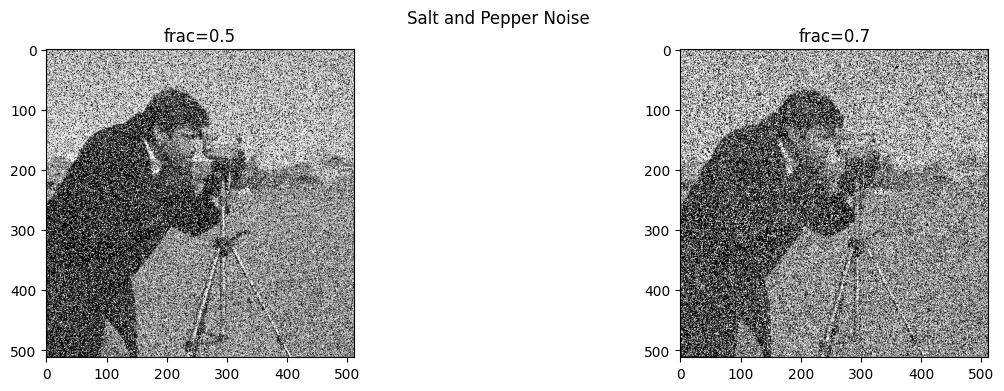

In [63]:
camera_man = example_images.camera()
fracs = [0.5, 0.7]
plt.figure()
fig, axes = plt.subplots(ncols=len(fracs), figsize=(15, 4))
for ax, frac in zip(axes, fracs):
    ax.imshow(saltNoise(camera_man, frac), cmap='gray')
    ax.set_title(f'frac={frac}')
fig.suptitle('Salt and Pepper Noise')

## 5.2 **TODO**: Denoising with a median filter

Now that you've applied noise to the image, you will clean it using a median filter. Median filtering works by replacing each pixel value with the median of the intensities in a neighborhood around the pixel. You may use `skimage.filters.median` for this.

Apply the median filter to noisy versions of the camera man images using the two noise types from above. Experiment with different noise settings. Plot the noisy and clean images side by side.

(-0.5, 511.5, 511.5, -0.5)

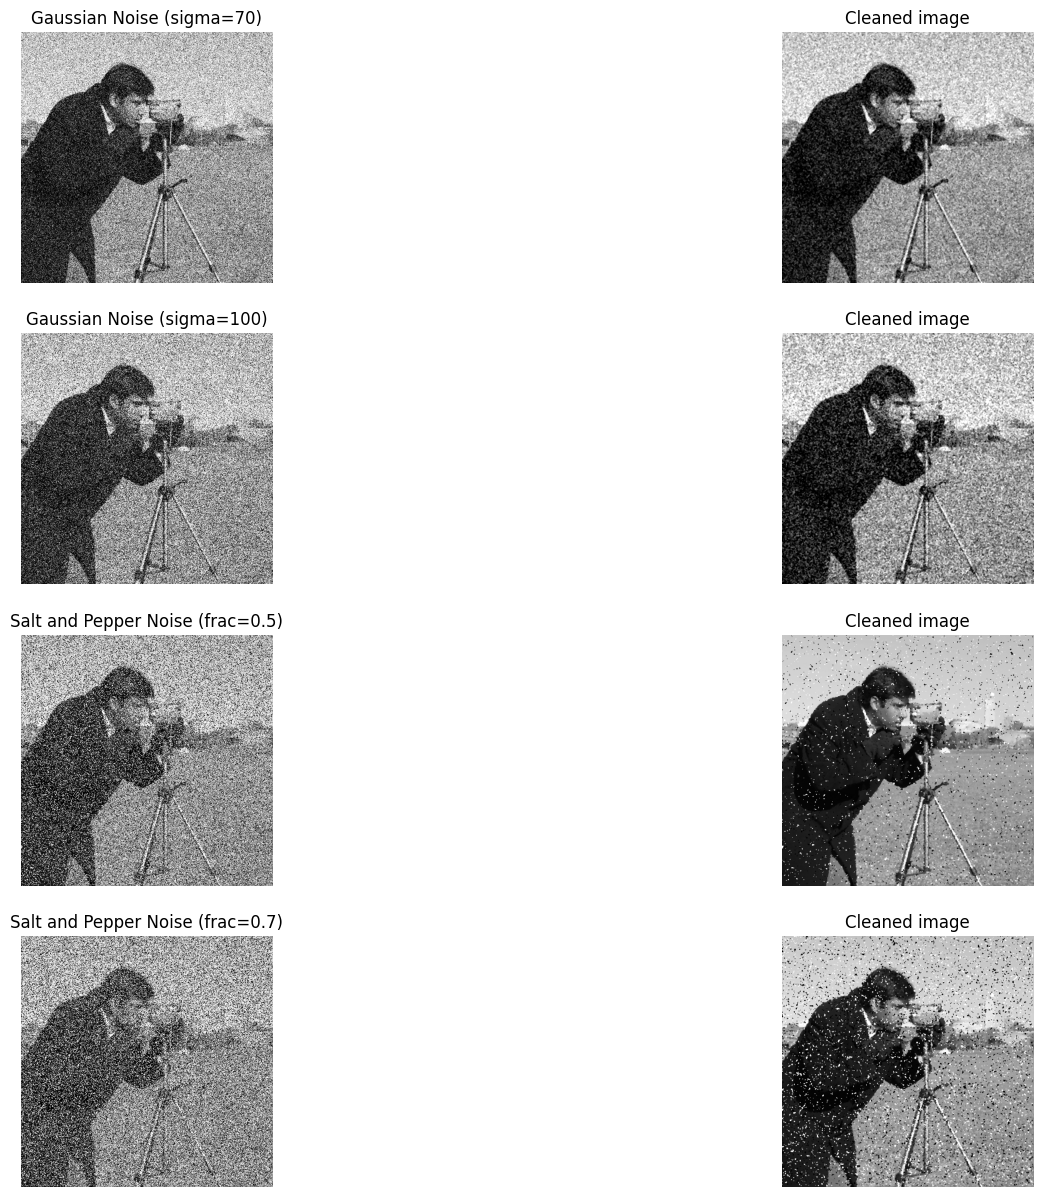

In [64]:
from skimage.filters import median

camera_man = example_images.camera()

gausNoise1 = gausNoise(camera_man, 70)
gausNoise2 = gausNoise(camera_man, 100)

saltNoise1 = saltNoise(camera_man, 0.5)
saltNoise2 = saltNoise(camera_man, 0.7)

gausClean1 = median(gausNoise1)
gausClean2 = median(gausNoise2)

saltClean1 = median(saltNoise1)
saltClean2 = median(saltNoise2)

fig, ax = plt.subplots(4, 2, figsize=(18, 15))
ax[0, 0].imshow(gausNoise1, cmap='gray')
ax[0, 0].set_title("Gaussian Noise (sigma=70)")
ax[0, 0].axis('off')

ax[0, 1].imshow(gausClean1, cmap='gray')
ax[0, 1].set_title("Cleaned image")
ax[0, 1].axis('off')

ax[1, 0].imshow(gausNoise2, cmap='gray')
ax[1, 0].set_title("Gaussian Noise (sigma=100)")
ax[1, 0].axis('off')

ax[1, 1].imshow(gausClean2, cmap='gray')
ax[1, 1].set_title("Cleaned image")
ax[1, 1].axis('off')

ax[2, 0].imshow(saltNoise1, cmap='gray')
ax[2, 0].set_title("Salt and Pepper Noise (frac=0.5)")
ax[2, 0].axis('off')

ax[2, 1].imshow(saltClean1, cmap='gray')
ax[2, 1].set_title("Cleaned image")
ax[2, 1].axis('off')

ax[3, 0].imshow(saltNoise2, cmap='gray')
ax[3, 0].set_title("Salt and Pepper Noise (frac=0.7)")
ax[3, 0].axis('off')

ax[3, 1].imshow(saltClean2, cmap='gray')
ax[3, 1].set_title("Cleaned image")
ax[3, 1].axis('off')


How effective is the median filter in removing salt-and-pepper noise? Why do you think it works so well (or so poorly)?

---

**YOUR ANSWER HERE**

---
The median filter was quite effective in removing salt-and-pepper noise. I think this is because the salt-and-pepper noise is simply the addition of high contrast pixels (either with a value of 0 or 255) which makes them easy to identify through the median filter. The median value of the neighboring pixels is closer to the original value as compared to the extreme values of the salt and pepper pixels, which makes them easy to identify and remove.

How did the median filter perform on the image with Gaussian noise? Is median filtering the best option for this type of noise? If not, what might work better?

---

**YOUR ANSWER HERE**

---
The median filter is less effective at removing Gaussian noise because Gaussian noise does not produce outliers like salt-and-pepper noise does. Instead, Gaussian noise distributes the noise across the whole image and even has a bit of a blurring effect depending on the value of sigma. This makes it extremely difficult for the median filter to differentiate between the pixel intensity variations caused by the noise vs. those resulting from edges and details on the image. As a result, median filtering is not the best option for this type of noise. It would be better to use something like the Gaussian filter to denoise these images because it can blur the image and remove the noise while still preserving important details due to it using the weighted average of nearby pixels.